In [3]:
import torch
import sys
sys.path.append('..')
sys.path.append('../..')
from utils import *
from model import *
from data import *
import numpy as np
import matplotlib.pyplot as plt

working_dir = f'/home/zhiqin/data/LLM/LLM_pami/LLM_init_exact/refine_adam_epoch_207_data_90w_warmup_normal_init_34_wrong_43_unseen_diff_ini/GPT_normal_init_diff_lr_1e-5_composition_task_34_unseen_43_unseen_diff_ini_0.5_test_eps_1e-08_wd_0.01_beta2_0.999/composition-N_900000-2L1H_seed1'
# print(os.listdir(exp_dir))
# working_dir = f'/home/zhiqin/data/LLM/LLM_new/refine_adam_epoch_207_data_90w_warmup_normal_init_34_wrong_43_unseen_diff_ini/GPT_normal_init_composition_task_34_unseen_43_unseen_diff_ini_0.5_test_eps_1e-08_wd_0.01_beta2_0.999/composition-N_900000-7L1H_seed1'
state_dict=torch.load(f'{working_dir}/model/model_209.pt')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
args = load_args(f'{working_dir}/config.json')

# model = myGPT(args, device)
model = myGPT_specific(args, device)
model.load_state_dict(state_dict)
model.to(device)

myGPT_specific(
  (embedding): Embedding(
    (tgt_emb): Embedding(201, 400)
    (pos_emb): Embedding(20, 400)
  )
  (decoder): Decoder(
    (layers): ModuleList(
      (0-1): 2 x DecoderLayer(
        (dec_self_attn): MultiHeadAttention(
          (W_Q): Linear(in_features=400, out_features=200, bias=False)
          (W_K): Linear(in_features=400, out_features=200, bias=False)
          (W_V): Linear(in_features=400, out_features=200, bias=False)
          (fc): Linear(in_features=200, out_features=400, bias=False)
          (layernorm): LayerNorm((400,), eps=1e-05, elementwise_affine=True)
        )
        (pos_ffn): PoswiseFeedForwardNet(
          (fc): Sequential(
            (0): Linear(in_features=400, out_features=1200, bias=False)
            (1): ReLU()
            (2): Linear(in_features=1200, out_features=400, bias=False)
          )
          (layernorm): LayerNorm((400,), eps=1e-05, elementwise_affine=True)
        )
      )
    )
  )
  (projection): Linear(in_features=4

(201, 400)
[0.04566025 0.04321518]
(40, 2)


/tmp/ipykernel_4013957/3684185361.py:37: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  sc = plt.scatter(X[i, 0]+0.02, X[i, 1], c=colors[i], s=0)


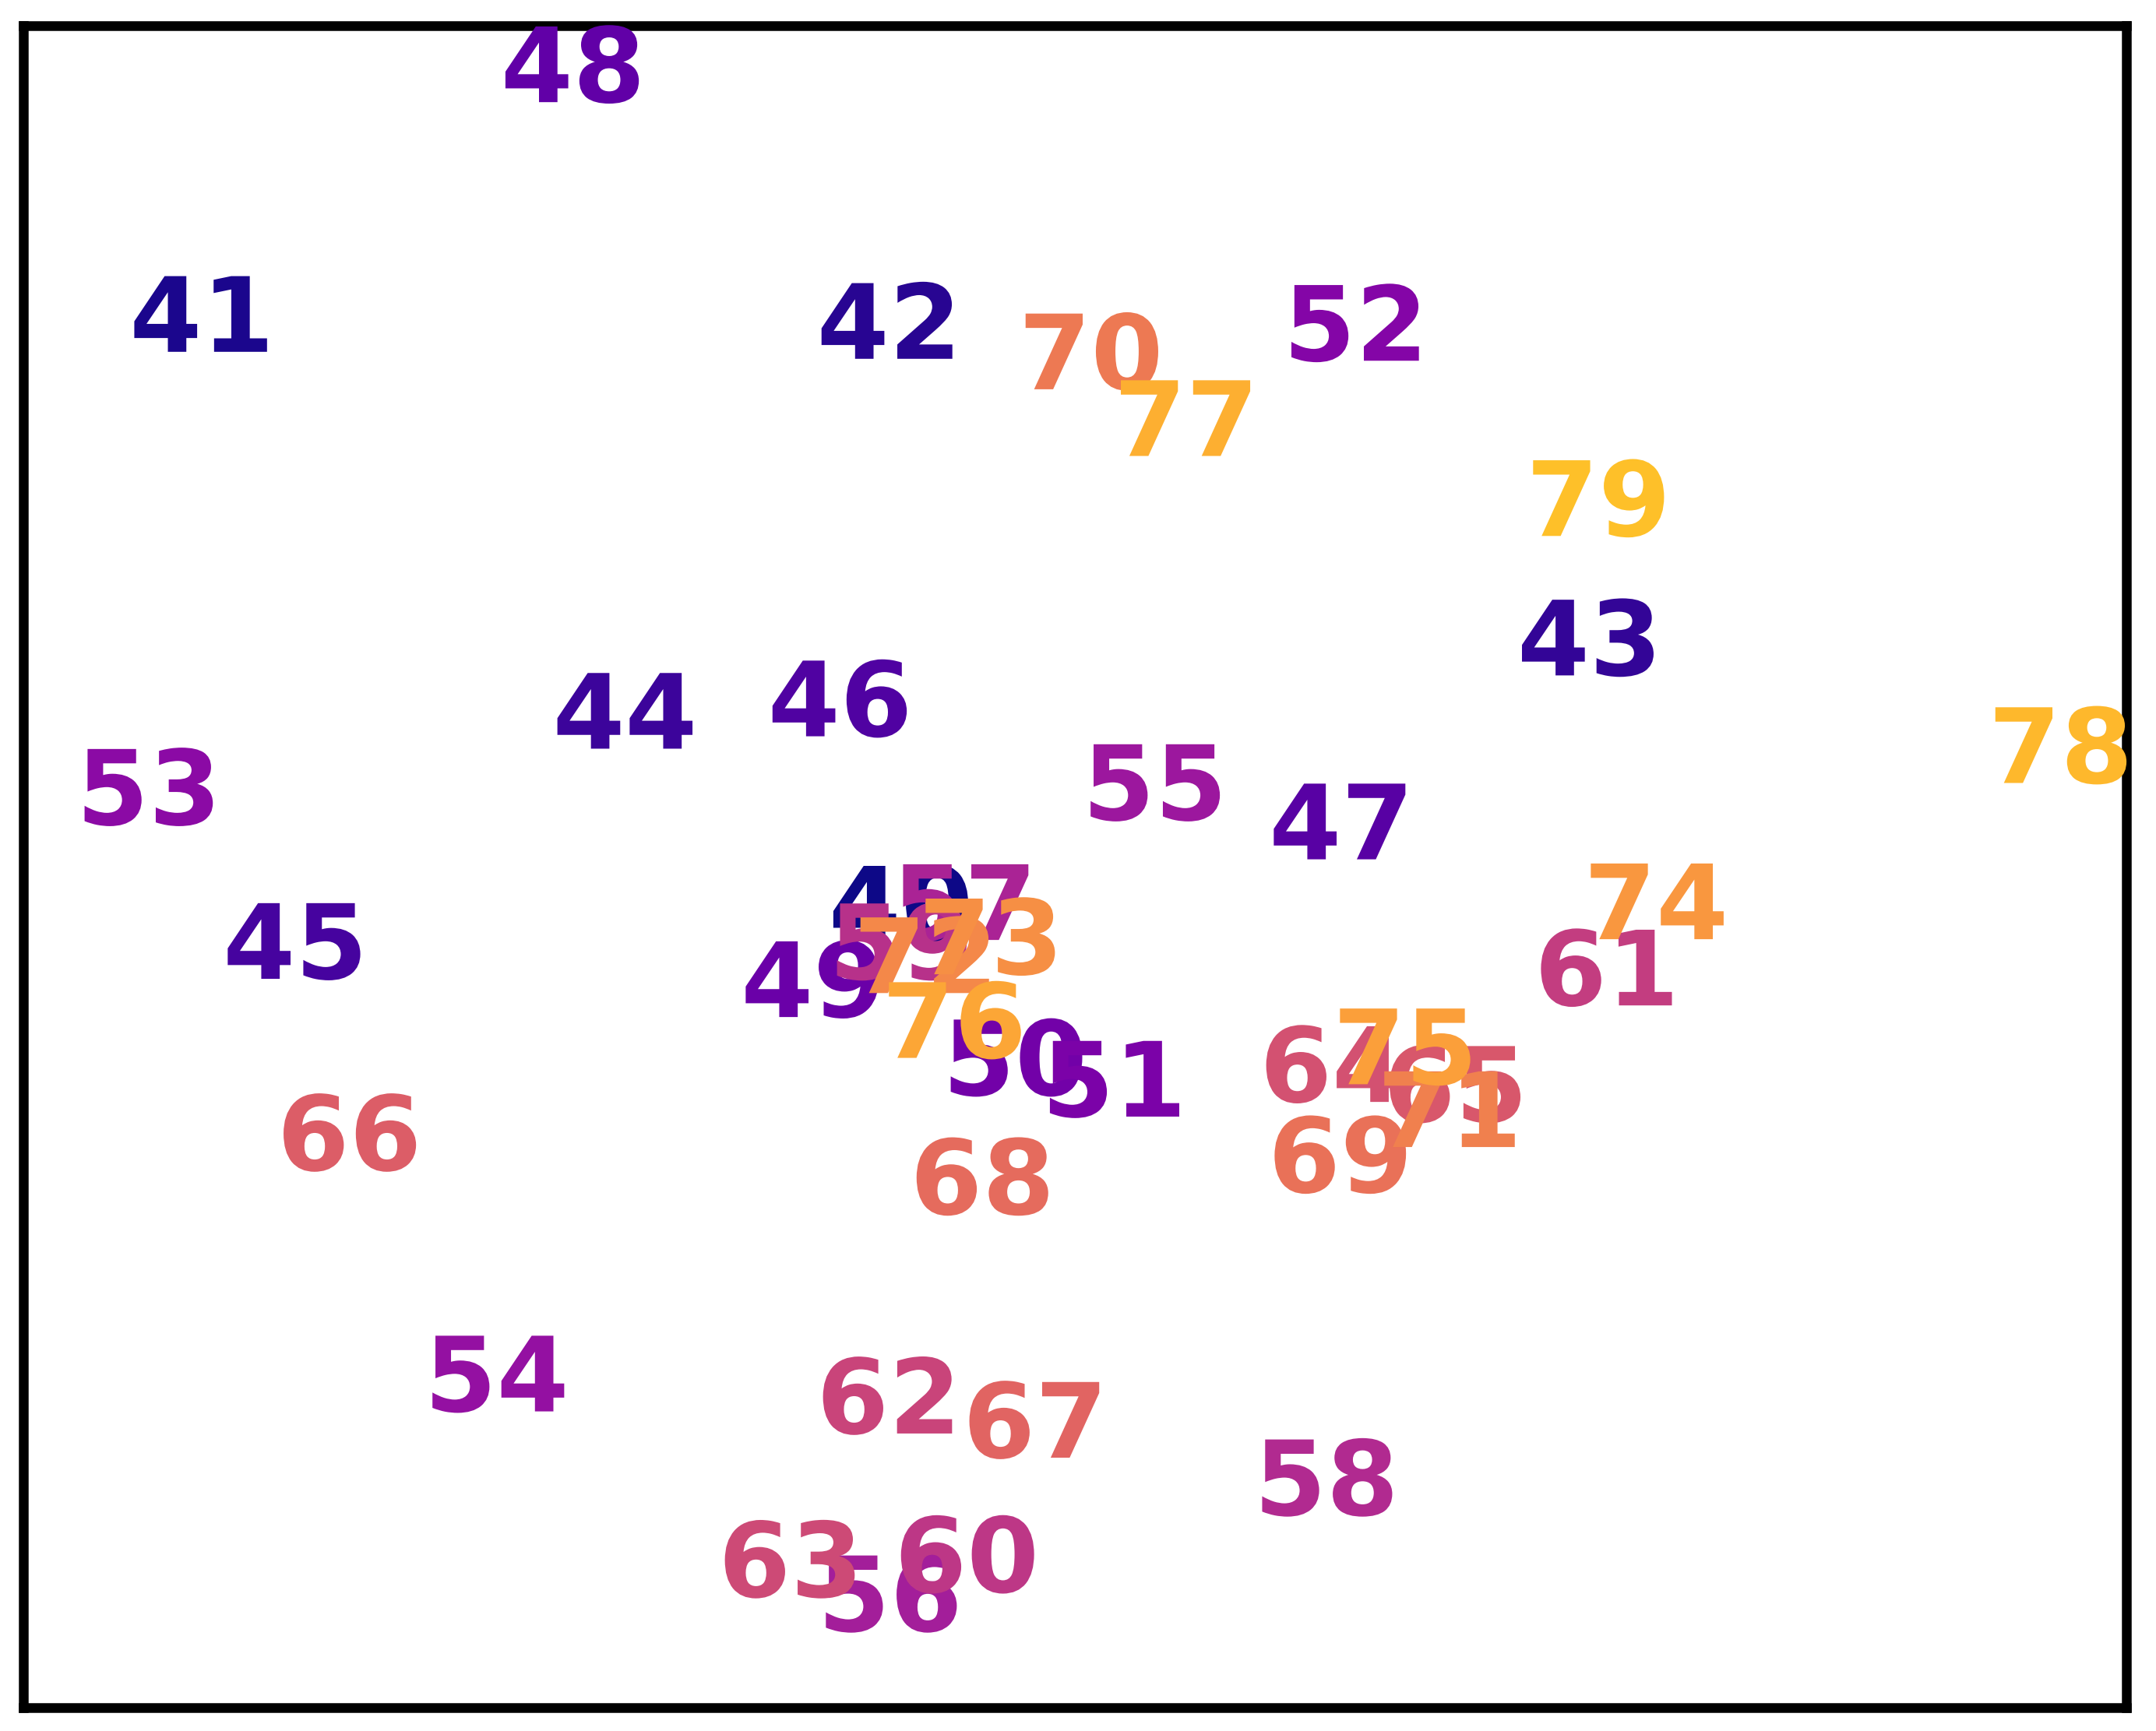

In [6]:
import torch
import numpy as np
import random
def setup_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
setup_seed(5)

mat=model.embedding.tgt_emb.weight.detach().cpu().numpy()
print(mat.shape)

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import matplotlib.patheffects as path_effects
pca = PCA(n_components=2)
X = pca.fit_transform(mat[40:80,:])
print(pca.explained_variance_ratio_)


fig = plt.figure(figsize=(10, 8), dpi=300)
format_settings(fs=32, lw=6, ms=12.5, axlw=3, major_tick_len=10, left=0.05, right=0.95, top=0.95, bottom=0.05)

# colors = cm.viridis(np.linspace(0, 1, 86))

colors = cm.plasma(np.linspace(0, 1, 46))

for i in range(40):
    sc = plt.scatter(X[i, 0]+0.02, X[i, 1], c=colors[i], s=0)
    plt.annotate(str(i+40), xy=(X[i, 0], X[i, 1]), xytext=(X[i, 0], X[i, 1]), color=colors[i], weight='bold', path_effects=[
        path_effects.SimpleLineShadow(offset=(10, -10)), 
        path_effects.Normal() 
    ])

plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.left'] = False

plt.xticks([])
plt.yticks([])
plt.savefig('/home/zhiqin/LLM_from_4090/plot_fot_pami/pic/tsne_emb_0.5.png', bbox_inches='tight', dpi=300)